## 5장 복습하기: mpg 데이터 파악해보기
- mpg(mile per gallon) 를 통해 데이터 파악해 보기
- 1999년 ~ 2008년까지 미국에서 출시된 자동차 234종의 정보를 담고 있음
- bit.ly/easypy_51
- manufacturer : 제조사
- model : 자동차 모델명
- displ : 배기량(cc)
- year : 생산 연도
- cyl : 실린더 수(4기통, 6기통, ...)
- trans : 변속기 종류 - 자동(auto)/수동(manual)
- drv : 구동 방식 (전륜 f, 후륜 r, 4륜 4)
- cty : 도심 주행시 연비 (예: 18마일/갤런)
- hwy : 고속도로 주행시 연비 (예: 18마일/갤런)
- fl : 연료 종류(일반 가솔린 p, 고급 가솔린 r)
- class : 자동차 크기(compact, suv, van, ...)

In [4]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

In [6]:
# mpg.head()
mpg_new = mpg.copy()
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [7]:
# 고속도로 연비를 나타내는 변수(컬럼) 이름을 hwy에서 highway로 변경
mpg_new = mpg_new.rename(columns={'hwy' : 'highway'})
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,highway,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [8]:
# 도시 연비를 나타내는 변수(컬럼) 이름을 cty에서 city로 변경
mpg_new = mpg_new.rename(columns={'cty' : 'city'})
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [18]:
# 도시연비와 고속도로 연비를 합한 값인 합산연비 total 파생변수(컬럼) 추가
mpg_new['total'] = (mpg_new['city'] + mpg_new['highway'])
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,mean,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,11.75,A
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,12.50,A
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,12.75,A
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,12.75,A
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,10.50,B


In [19]:
# 도시연비와 고속도록 연비를 합한 값인 합산연비 total 변수를 2로 나눈 평균연비 mean
mpg_new['mean'] = (mpg_new['total']) / 2
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,mean,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,23.5,A
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,25.0,A
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,25.5,A
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,25.5,A
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,21.0,B


In [20]:
# 자동차 합산연비 total 변수(컬럼)의 요약통게량 구하기
# 요약통계량에서 25%, 75% 값 확인하기
mpg_new['total'].describe()

count    234.000000
mean      40.299145
std       10.100580
min       21.000000
25%       31.000000
50%       41.000000
75%       47.000000
max       79.000000
Name: total, dtype: float64

In [21]:
# 합산연비 total 값에 따라
# 합산연비 total 값이 75% 초과이면 'A'
# 합산연비 total 값이 25% 값 이상 ~ 75% 값 미만이면 'B'
# 합산연비 total 값이 25% 값 미만이면 'C'
# 값을 갖는 'grade' 파생변수 추가
import numpy as np
mpg_new['grade'] = np.where(mpg_new['total'] >= 47, 'A', 
                   np.where(mpg_new['total'] >= 31, 'B', 'C'))
mpg_new.head()


,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,mean,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,23.5,A
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,25.0,A
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,25.5,A
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,25.5,A
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,21.0,B


In [22]:
# 합산 연비 값에 따라 A, B, C 등급으로 분류된 데이터 빈도수 테이블 생성
count_grade = mpg_new['grade'].value_counts().sort_index()
count_grade

A     61
B    126
C     47
Name: grade, dtype: int64

<AxesSubplot:>

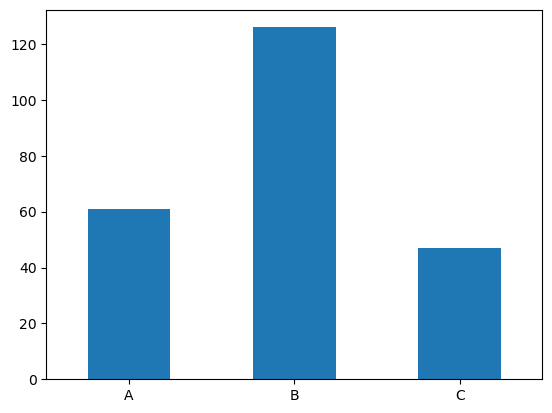

In [23]:
# 합산 연비 값에 따라 A, B, C 등급으로 분휴된 데이터 개수 테이블로 막대 그래프 그리기
count_grade.plot.bar(rot=0)